# **Final Project: Stock Price Prediction**

## Introduction
The stock market is a critical component of any economy, serving as a barometer of the overall financial health of a nation. The ability to predict stock prices and trends is therefore of paramount importance for investors, traders, and policymakers. In this project, we explore the use of machine learning techniques for predicting the stock prices of Reliance Industries Limited (RIL), one of the largest conglomerates in India. Specifically, we analyze the RIL stock prices from August 2020 to August 2021, using time-series models to forecast future prices and trends.

## Goal
The goal of this project is to build and evaluate various machine learning models to predict the RIL stock prices and trends. We aim to compare the performance of different models, such as Linear Regression, Support Vector Regression, Random Forest, K-Nearest Neighbors, Long Short-Term Memory, and Gated Recurrent Unit, for both regression and classification tasks. By leveraging various techniques, such as hyperparameter tuning and regularization, we aim to develop accurate and reliable models for predicting the RIL stock prices. We also intend to test the model performance on dataset shift and timestep shift for our evaluation in order to gain more insights on how the data would influence the prediction results.

## **0. Package Imports**

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## **1. Data Preprocessing**

### **1.1 Data Acquisition**


In [ ]:
# import dataset
from google.colab import drive

drive.mount('/content/drive')

stock_raw = pd.read_csv('/content/drive/MyDrive/519 Project/RELIANCE.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stock_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


### **1.2 Data Cleaning**

**Check for missing values**

---

To ensure the accuracy of the exploratory data analysis of the stock dataset, a crucial initial step is to perform fundamental data cleaning on the raw data. One such step is to verify the presence of any missing values and eliminate the corresponding rows.

In [ ]:
# Check null values
stock_df = stock_raw
stock_df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
# drop rows with missing values
stock_df.dropna(inplace=True)

In [ ]:
# confirm
stock_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Process Data Types**

---
Upon inspecting the actual value of the "stock_df" dataset, it was discovered that the Date column is in the UNIX timestamp format, which requires conversion to a suitable format for further analysis.


In [ ]:
# check the data type of each column
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.6+ KB


In [ ]:
# Since the date originally has object type, we need to convert it into Date format
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [ ]:
# confirm
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       249 non-null    datetime64[ns]
 1   Open       249 non-null    float64       
 2   High       249 non-null    float64       
 3   Low        249 non-null    float64       
 4   Close      249 non-null    float64       
 5   Adj Close  249 non-null    float64       
 6   Volume     249 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.6 KB


**Sort Dataset by Date**

---

To ensure optimal performance of our model trained on the trend based on date, it is advisable to arrange the dataset in ascending order based on the Date column.

In [ ]:
# sort dataset by date
stock_df.sort_values(by='Date', inplace=True)

In [ ]:
# confirm
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


**Add Labels**

---

To facilitate future analysis of the trend in the time-series data, we have created a label that indicates whether the closing value is greater than the opening value.

In [ ]:
# Create a column to specify whether the close is higher than open or not
stock_df['Increase'] = np.where(stock_df['Close'] >= stock_df['Open'], 1, 0)

In [ ]:
# confirm
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Increase
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0,0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0,0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0,0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0,1
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0,0


## **2. Exploratory Data Analysis**

Given that the dataset has a time-series structure, it is pertinent to examine its size. By printing the first and last dates of the dataset, we have determined that it commences on 2020-08-19 and concludes on 2021-08-18.

In [ ]:
# get start date, end date and total duration
print("Starting date: ", stock_df.iloc[0][0])
print("Ending date: ", stock_df.iloc[-1][0])
print("Duration: ", stock_df.iloc[-1][0] - stock_df.iloc[0][0])


Starting date:  2020-08-19 00:00:00
Ending date:  2021-08-18 00:00:00
Duration:  364 days 00:00:00


### **2.1 Open/close trend**

In [ ]:
close_df = stock_df[['Date', 'Close']]
open_df = stock_df[['Date', 'Open']]

**Plot daily closing price chart**

---



<Axes: title={'center': 'Trend of Closing Price by Day'}, xlabel='Date', ylabel='Close'>

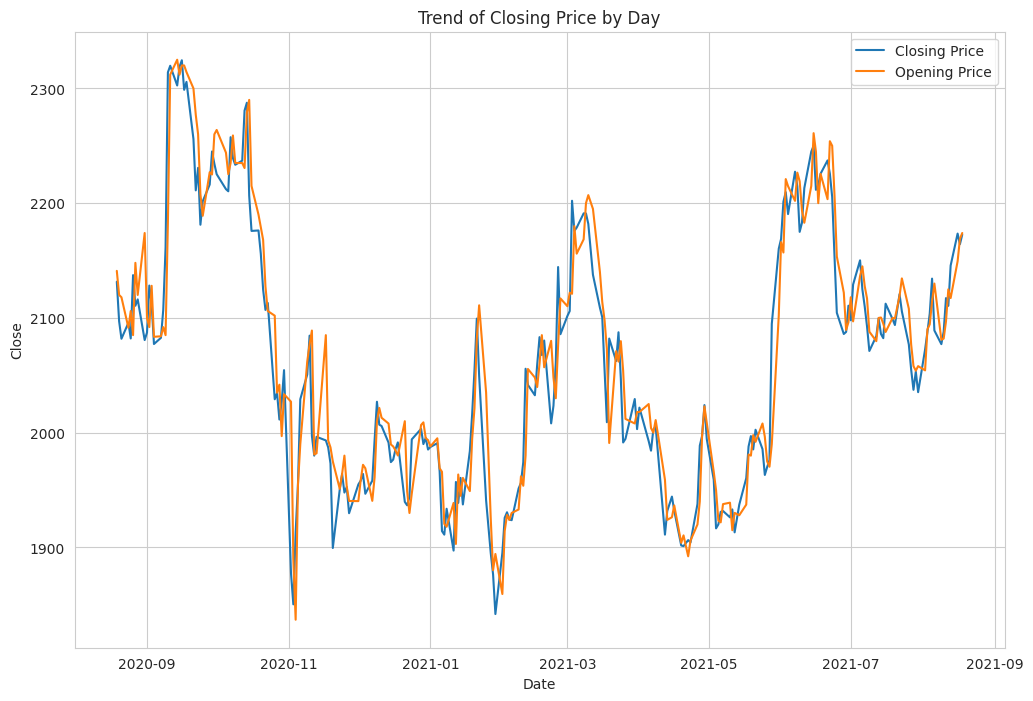

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=close_df, x="Date", y="Close", label="Closing Price").set(title='Trend of Closing Price by Day')
sns.lineplot(data=open_df, x="Date", y="Open", label="Opening Price")

**Plot weekly closing price chart**


---



In [ ]:
# set "Date" column as index
week_df = stock_df.set_index('Date')

# use resample() to convert to weekly data
week_df = week_df.resample('w').mean()

# confirm
week_df.head()

,Open,High,Low,Close,Adj Close,Volume,Increase
Date,,,,,,,
2020-08-23,2126.333333,2133.299967,2095.450033,2103.483399,2096.738363,1.259991e+07,0.0
2020-08-30,2110.079980,2129.329980,2081.000000,2108.380029,2101.619287,1.543510e+07,0.4
2020-09-06,2115.510010,2134.019971,2076.589990,2097.100000,2090.375439,1.612519e+07,0.2
2020-09-13,2151.220020,2215.470020,2133.730029,2196.970020,2189.925195,2.809700e+07,0.8
2020-09-20,2318.239990,2341.650000,2289.820020,2310.080029,2302.672558,1.514621e+07,0.4


<Axes: title={'center': 'Trend of Closing Price by Week'}, xlabel='Date', ylabel='Close'>

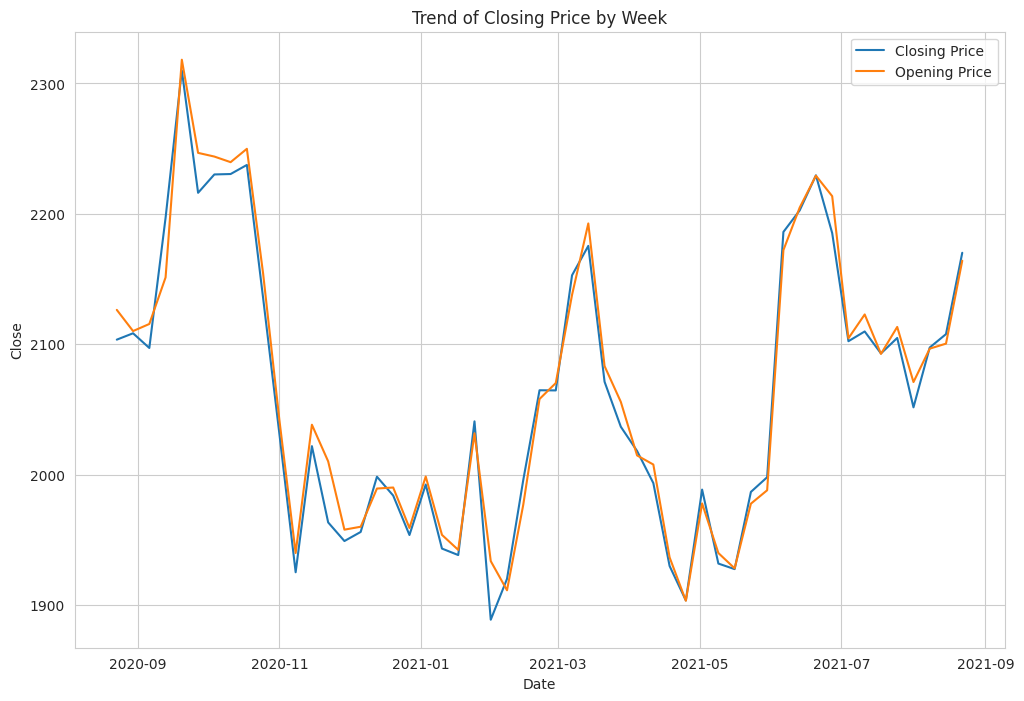

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=week_df, x="Date", y="Close", label="Closing Price").set(title='Trend of Closing Price by Week')
sns.lineplot(data=week_df, x="Date", y="Open", label="Opening Price")

**Plot monthly closing price chart**


---



In [ ]:
# set "Date" column as index
month_df = stock_df.set_index('Date')

# use resample() to convert to monthly data
month_df = month_df.resample('m').mean()

# confirm
month_df.head()

,Open,High,Low,Close,Adj Close,Volume,Increase
Date,,,,,,,
2020-08-31,2122.599989,2135.616645,2083.522244,2103.672255,2096.926622,1.595815e+07,0.222222
2020-09-30,2213.488636,2244.511364,2185.736384,2214.381836,2207.281183,1.721645e+07,0.409091
2020-10-31,2175.769049,2197.745233,2143.111904,2161.842855,2154.910656,1.237273e+07,0.333333
2020-11-30,1985.213160,2005.728940,1942.297363,1964.847367,1958.546856,2.262176e+07,0.315789
2020-12-31,1980.765897,1997.636364,1955.743186,1978.338645,1971.994890,1.058042e+07,0.409091


<Axes: title={'center': 'Trend of Closing Price by Month'}, xlabel='Date', ylabel='Close'>

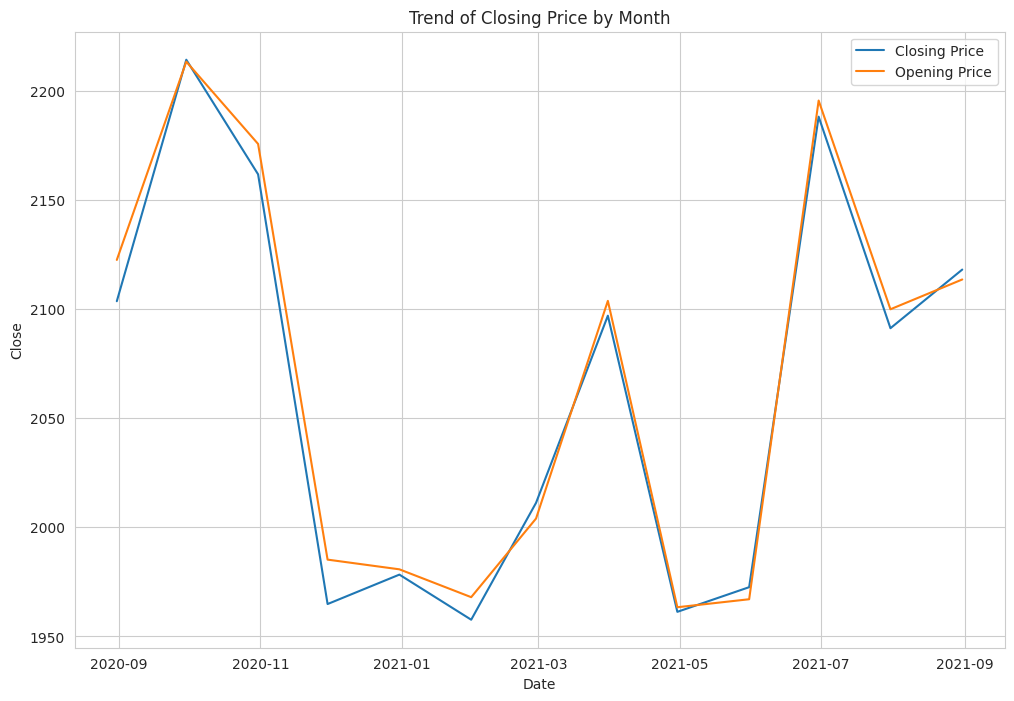

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=month_df, x="Date", y="Close", label="Closing Price").set(title='Trend of Closing Price by Month')
sns.lineplot(data=month_df, x="Date", y="Open", label="Opening Price")

From the previous plots, it is difficult to discern a distinct periodic pattern from the plot, but three significant peaks can be identified in 2020-10, 2021-04, and 2021-07. Additionally, the general trend of the closing price closely aligns with that of the opening price.

### **2.2 Up/down trend**

**Daily Up/down distribution**


---

Upon examining the distribution of daily up/down trends, it is evident that there are more decreasing trends than increasing ones, indicating an imbalance in the dataset. This insight has led us to consider implementing dataset shift to address this feature skew in a later section by formulating the question into a classification issue.

In [ ]:
daily_up_down_df = stock_df[['Date', 'Increase']]
daily_up_down_df.groupby(['Increase']).count()

,Date
Increase,
0,152
1,97


**Weekly Up/down distribution**

---

To obtain a weekly perspective, we retain the opening price for the start of each week and the closing price for the end of each week. We then calculate the difference between them to determine the up/down trend and plot the resultant values.

In [ ]:
weekly_up_down_df = stock_df[['Date', 'Open', 'Close']]

# Resample the data to weekly frequency, taking the first value for each week as the opening price
opening_price = weekly_up_down_df.resample('W', on='Date')['Open'].first()

# Resample the data to weekly frequency, taking the last value for each week as the closing price
closing_price = weekly_up_down_df.resample('W', on='Date')['Close'].last()

# Calculate the difference between the closing and opening prices for each week
price_diff = closing_price - opening_price

# Combine the opening and closing prices and the price difference into a single dataframe
weekly_prices = pd.concat([opening_price, closing_price, price_diff], axis=1)

# Rename the columns
weekly_prices.columns = ['opening_price', 'closing_price', 'price_diff']

# Reset columns
weekly_prices = weekly_prices.reset_index()
weekly_prices['Date'] = weekly_prices['Date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))


# Display the results
print(weekly_prices)

          Date  opening_price  closing_price  price_diff
0   2020-08-23    2141.000000    2081.850098  -59.149902
1   2020-08-30    2091.399902    2116.149902   24.750000
2   2020-09-06    2174.000000    2077.250000  -96.750000
3   2020-09-13    2084.000000    2319.750000  235.750000
4   2020-09-20    2325.000000    2305.699951  -19.300049
5   2020-09-27    2300.000000    2201.699951  -98.300049
6   2020-10-04    2227.000000    2225.250000   -1.750000
7   2020-10-11    2244.000000    2233.449951  -10.550049
8   2020-10-18    2235.000000    2175.800049  -59.199951
9   2020-10-25    2190.050049    2113.050049  -77.000000
10  2020-11-01    2101.949951    2054.500000  -47.449951
11  2020-11-08    2027.000000    2029.150024    2.150024
12  2020-11-15    2062.100098    1996.400024  -65.700074
13  2020-11-22    2085.000000    1899.500000 -185.500000
14  2020-11-29    1951.000000    1929.800049  -21.199951
15  2020-12-06    1940.349976    1946.750000    6.400024
16  2020-12-13    1940.599976  

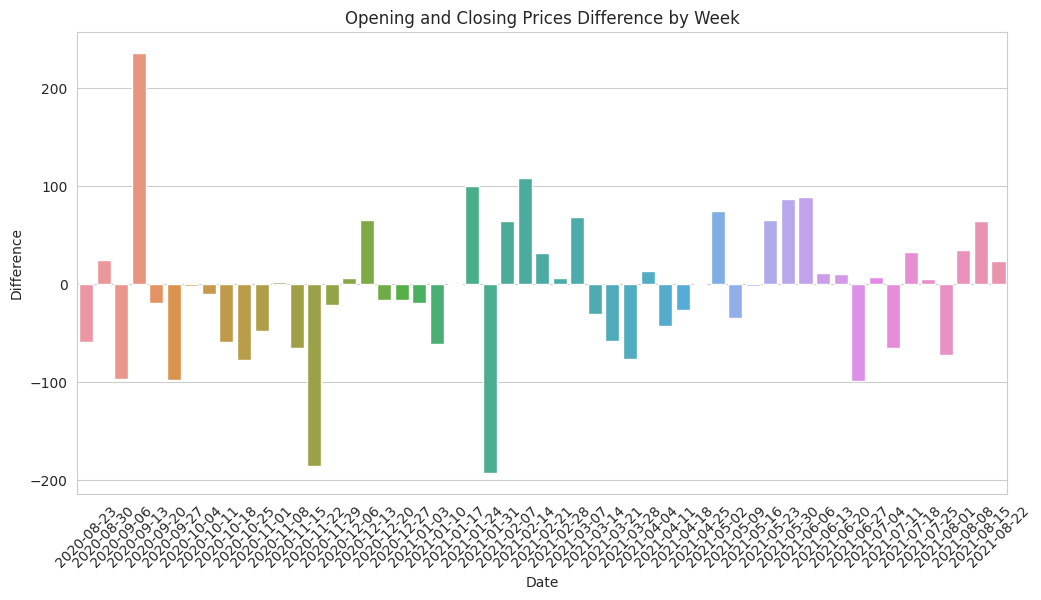

In [ ]:
# plot the difference according to Date/Week
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# create the barplot
sns.barplot(x="Date", y="price_diff", data=weekly_prices)

# set labels and title
plt.xlabel("Date")
plt.ylabel("Difference")
plt.title("Opening and Closing Prices Difference by Week")
plt.xticks(rotation=45)


plt.show()

**Monthly Up/down distribution**

---

To analyze the up/down distribution on a monthly basis, we take the opening price at the beginning of each week and the closing price at the end of each week. We then calculate the difference between them to determine the up/down trend and plot the resulting values.

In [ ]:
monthly_up_down_df = stock_df[['Date', 'Open', 'Close']]

# Resample the data to weekly frequency, taking the first value for each week as the opening price
opening_price = monthly_up_down_df.resample('M', on='Date')['Open'].first()

# Resample the data to weekly frequency, taking the last value for each week as the closing price
closing_price = monthly_up_down_df.resample('M', on='Date')['Close'].last()

# Calculate the difference between the closing and opening prices for each week
price_diff = closing_price - opening_price

# Combine the opening and closing prices and the price difference into a single dataframe
monthly_prices = pd.concat([opening_price, closing_price, price_diff], axis=1)

# Rename the columns
monthly_prices.columns = ['opening_price', 'closing_price', 'price_diff']

# Reset columns
monthly_prices = monthly_prices.reset_index()
monthly_prices['Date'] = monthly_prices['Date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))


# Display the results
print(monthly_prices)

          Date  opening_price  closing_price  price_diff
0   2020-08-31    2141.000000    2080.699951  -60.300049
1   2020-09-30    2100.000000    2234.350098  134.350098
2   2020-10-31    2263.800049    2054.500000 -209.300049
3   2020-11-30    2027.000000    1929.800049  -97.199951
4   2020-12-31    1940.349976    1985.300049   44.950073
5   2021-01-31    1988.000000    1841.949951 -146.050049
6   2021-02-28    1859.400024    2085.800049  226.400025
7   2021-03-31    2110.199951    2003.099976 -107.099975
8   2021-04-30    2018.000000    1994.500000  -23.500000
9   2021-05-31    1966.000000    2160.300049  194.300049
10  2021-06-30    2166.000000    2110.649902  -55.350098
11  2021-07-31    2118.000000    2035.300049  -82.699951
12  2021-08-31    2054.300049    2172.649902  118.349853


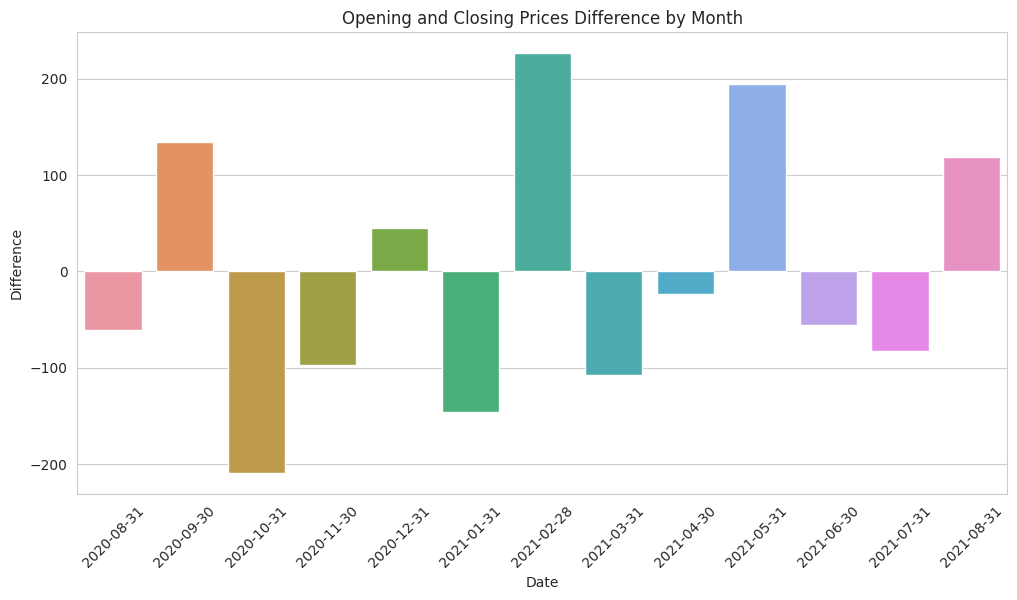

In [ ]:
# plot the difference according to Date/Week
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# create the barplot
sns.barplot(x="Date", y="price_diff", data=monthly_prices)

# set labels and title
plt.xlabel("Date")
plt.ylabel("Difference")
plt.title("Opening and Closing Prices Difference by Month")
plt.xticks(rotation=45)


plt.show()

## **3. Feature Engineering**


### Dataset shift(Classification only)

**Distribution Shift**

---

Since we find out the distribution of the 'open' column is unbalanced, so we used smote technique to resample the data and make it balance

In [ ]:

sdf = stock_df.copy()
features = sdf.drop(columns = ['Date','Increase','Close','Adj Close'])
scaler1=MinMaxScaler(feature_range=(0,1))
features_scaled=scaler1.fit_transform(features)
label = sdf['Increase']
# Use y_train, y_test for evaluation
X_train, X_test, y_train, y_test = train_test_split(features_scaled, label, test_size=0.3, random_state=42)


sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# Use X_train_balanced, X_test_balanced for training
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_train_res, 
                                                                                        y_train_res, test_size=0.3, random_state=42)


**Logistic Regression**

---
We used the resampled dataset and original dataset to feed the logistic regression model and evaluate these two datasets.

In [ ]:
lgr1 = LogisticRegression()
lgr1.fit(X_train_balanced,y_train_balanced)
lgrl_pred_test1 = lgr1.predict(X_test)
print("accracy is ",mean_squared_error(y_test,lgrl_pred_test1))

accracy is  0.37333333333333335


In [ ]:
lgr2 = LogisticRegression()
lgr2.fit(X_train_balanced,y_train_balanced)
lgrl_pred_test2 = lgr2.predict(X_test_balanced)
print("accracy is ",mean_squared_error(y_test_balanced,lgrl_pred_test2))

accracy is  0.5384615384615384


**Random Forest**

---
We used the resampled dataset and original dataset to feed the random forest model and evaluate these two datasets.

In [ ]:
classifier1 = RandomForestClassifier()
classifier1.fit(X_train_balanced,y_train_balanced)
rf_pred_test1 = classifier1.predict(X_test)
print("accracy is ",mean_squared_error(y_test,rf_pred_test1))

accracy is  0.49333333333333335


In [ ]:
classifier2 = RandomForestClassifier()
classifier2.fit(X_train_balanced,y_train_balanced)
rf_pred_test2 = classifier2.predict(X_test_balanced)
print("accracy is ",mean_squared_error(y_test_balanced,rf_pred_test2))

accracy is  0.2923076923076923


### Timeseries Dataset create(Regression)

**Dataset Creation**

---
We selected the column 'open' and split the data into train and test datasets. We set time_step=15 as the baseline model.

In [ ]:
opendf = stock_df['Open']
scaler2=MinMaxScaler(feature_range=(0,1))
opendf=scaler2.fit_transform(np.array(opendf).reshape(-1,1))

training_size=int(len(opendf)*0.65)
test_size=len(opendf)-training_size
train_data,test_data=opendf[0:training_size,:],opendf[training_size:len(opendf),:1]


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train_reg, y_train_reg = create_dataset(train_data, time_step)
X_test_reg, y_test_reg = create_dataset(test_data, time_step)

In [ ]:
print(X_train_reg)

[[0.62295082 0.57991803 0.57581967 ... 0.50522551 0.50614754 0.52254098]
 [0.57991803 0.57581967 0.52131127 ... 0.50614754 0.52254098 0.50819672]
 [0.57581967 0.52131127 0.55122951 ... 0.52254098 0.50819672 0.70922151]
 ...
 [0.6210042  0.56762295 0.53493862 ... 0.37090164 0.38514334 0.34221311]
 [0.56762295 0.53493862 0.48340144 ... 0.38514334 0.34221311 0.33401639]
 [0.53493862 0.48340144 0.31557377 ... 0.34221311 0.33401639 0.35655738]]


## **4. Baseline Model Training**


### **4.1 Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_reg,y_train_reg)
y_testpred_lr = lr.predict(X_test_reg)
y_trainpred_lr = lr.predict(X_train_reg)

In [ ]:
train_predict = scaler2.inverse_transform(y_trainpred_lr.reshape(-1,1))
test_predict = scaler2.inverse_transform(y_testpred_lr.reshape(-1,1))
original_ytrain = scaler2.inverse_transform(y_train_reg.reshape(-1,1)) 
original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1)) 

In [ ]:

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  37.78934443997101
Train data MSE:  1428.034553202768
Train data MAE:  26.762085748002704
-------------------------------------------------------------------------------------
Test data RMSE:  27.663502135344295
Test data MSE:  765.2693503921984
Test data MAE:  19.755206637915144


In [ ]:
from sklearn.metrics import explained_variance_score
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8972694369292128
Test data explained variance regression score: 0.9116220324593654


In [ ]:
from sklearn.metrics import r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8972694369292128
Test data R2 score: 0.9069587705878573


### **4.2 SVR**

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_reg, y_train_reg)
y_testpred_svr = svr.predict(X_test_reg)
y_trainpred_svr = svr.predict(X_train_reg)

In [ ]:
train_predict = scaler2.inverse_transform(y_trainpred_svr.reshape(-1,1))
test_predict = scaler2.inverse_transform(y_testpred_svr.reshape(-1,1))
original_ytrain = scaler2.inverse_transform(y_train_reg.reshape(-1,1)) 
original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1)) 

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  35.416634876702446
Train data MSE:  1254.338025989656
Train data MAE:  30.418921141892127
-------------------------------------------------------------------------------------
Test data RMSE:  54.721961051687636
Test data MSE:  2994.4930213424186
Test data MAE:  44.08508967301643


In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9100814586709214
Test data explained variance regression score: 0.6361713806978118


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9097648923115936
Test data R2 score: 0.6359303923135133


### **4.3 Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state = 42)
regressor.fit(X_train_reg, y_train_reg)
y_testpred_svr = regressor.predict(X_test_reg)
y_trainpred_svr = regressor.predict(X_train_reg)

In [ ]:
train_predict = scaler2.inverse_transform(y_trainpred_svr.reshape(-1,1))
test_predict = scaler2.inverse_transform(y_testpred_svr.reshape(-1,1))
original_ytrain = scaler2.inverse_transform(y_train_reg.reshape(-1,1)) 
original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1)) 

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  15.817512005889943
Train data MSE:  250.19368605647253
Train data MAE:  11.735482642137894
-------------------------------------------------------------------------------------
Test data RMSE:  36.458026220919535
Test data MSE:  1329.1876759252564
Test data MAE:  27.951532394861133


In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.982003319062549
Test data explained variance regression score: 0.8412714902705837


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9820014591469849
Test data R2 score: 0.8383977413649529


### **4.4 KNN**

One of the main advantages of using KNN in stock prediction is that it can capture the non-linear relationships between different stock prices, which may not be captured by traditional linear regression models.

In [ ]:
from sklearn import neighbors

K = time_step
knn = neighbors.KNeighborsRegressor(n_neighbors = K)
knn.fit(X_train_reg, y_train_reg)
y_testpred_knn = knn.predict(X_test_reg)
y_trainpred_knn = knn.predict(X_train_reg)


In [ ]:
train_predict = scaler2.inverse_transform(y_trainpred_knn.reshape(-1,1))
test_predict = scaler2.inverse_transform(y_testpred_knn.reshape(-1,1))
original_ytrain = scaler2.inverse_transform(y_train_reg.reshape(-1,1)) 
original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1)) 

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  49.27121801035765
Train data MSE:  2427.652924224192
Train data MAE:  36.94466657471264
-------------------------------------------------------------------------------------
Test data RMSE:  59.16250767622416
Test data MSE:  3500.2023145392823
Test data MAE:  45.24689046481481


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8253584611894313
Test data R2 score: 0.5744464006443475


### **4.5 LSTM**

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) that has been widely used in stock prediction models due to its ability to capture long-term dependencies and non-linear relationships in time series data.

In [ ]:
X_train =X_train_reg.reshape(X_train_reg.shape[0],X_train_reg.shape[1], 1)
X_test = X_test_reg.reshape(X_test_reg.shape[0],X_test_reg.shape[1], 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_reg,y_train_reg,validation_data=(X_test_reg,y_test_reg),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
29/29 [==============================] - 8s 96ms/step - loss: 0.0746 - val_loss: 0.0312
Epoch 2/200
29/29 [==============================] - 1s 31ms/step - loss: 0.0321 - val_loss: 0.0257
Epoch 3/200
29/29 [==============================] - 1s 30ms/step - loss: 0.0318 - val_loss: 0.0273
Epoch 4/200
29/29 [==============================] - 1s 28ms/step - loss: 0.0300 - val_loss: 0.0215
Epoch 5/200
29/29 [==============================] - 1s 29ms/step - loss: 0.0289 - val_loss: 0.0209
Epoch 6/200
29/29 [==============================] - 1s 23ms/step - loss: 0.0288 - val_loss: 0.0196
Epoch 7/200
29/29 [==============================] - 1s 20ms/step - loss: 0.0274 - val_loss: 0.0203
Epoch 8/200
29/29 [==============================] - 1s 22ms/step - loss: 0.0264 - val_loss: 0.0184
Epoch 9/200
29/29 [==============================] - 1s 20ms/step - loss: 0.0300 - val_loss: 0.0156
Epoch 10/200
29/29 [==============================] - 1s 18ms/step - loss: 0.0225 - val_loss: 0.0145

In [ ]:
train_predict=model.predict(X_train_reg)
test_predict=model.predict(X_test_reg)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 8ms/step


((145, 1), (72, 1))

In [ ]:
train_predict = scaler2.inverse_transform(train_predict)
test_predict = scaler2.inverse_transform(test_predict)
original_ytrain = scaler2.inverse_transform(y_train_reg.reshape(-1,1)) 
original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1)) 

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  30.902103957475184
Train data MSE:  954.9400289986033
Train data MAE:  22.94895104191811
-------------------------------------------------------------------------------------
Test data RMSE:  33.15360014397498
Test data MSE:  1099.1612025065776
Test data MAE:  25.058013880642363


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9313031140193071
Test data R2 score: 0.866364294413556


### **4.6 GRU**

Gated Recurrent Units (GRU) is another type of recurrent neural network (RNN) that is similar to LSTM, but with fewer parameters and computational complexity. GRU has also been used in stock prediction models due to its ability to handle long-term dependencies in time series data.

In [ ]:
X_train =X_train_reg.reshape(X_train_reg.shape[0],X_train_reg.shape[1] , 1)
X_test = X_test_reg.reshape(X_test_reg.shape[0],X_test_reg.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (145, 15, 1)
X_test:  (72, 15, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_reg,y_train_reg,validation_data=(X_test_reg,y_test_reg),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
29/29 [==============================] - 10s 81ms/step - loss: 0.0596 - val_loss: 0.0388
Epoch 2/200
29/29 [==============================] - 1s 21ms/step - loss: 0.0263 - val_loss: 0.0181
Epoch 3/200
29/29 [==============================] - 1s 22ms/step - loss: 0.0218 - val_loss: 0.0120
Epoch 4/200
29/29 [==============================] - 1s 23ms/step - loss: 0.0193 - val_loss: 0.0126
Epoch 5/200
29/29 [==============================] - 1s 25ms/step - loss: 0.0192 - val_loss: 0.0154
Epoch 6/200
29/29 [==============================] - 1s 22ms/step - loss: 0.0169 - val_loss: 0.0102
Epoch 7/200
29/29 [==============================] - 1s 22ms/step - loss: 0.0147 - val_loss: 0.0079
Epoch 8/200
29/29 [==============================] - 1s 26ms/step - loss: 0.0131 - val_loss: 0.0072
Epoch 9/200
29/29 [==============================] - 1s 25ms/step - loss: 0.0123 - val_loss: 0.0063
Epoch 10/200
29/29 [==============================] - 1s 24ms/step - loss: 0.0110 - val_loss: 0.006

In [ ]:
train_predict=model.predict(X_train_reg)
test_predict=model.predict(X_test_reg)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 9ms/step


((145, 1), (72, 1))

In [ ]:
train_predict = scaler2.inverse_transform(train_predict)
test_predict = scaler2.inverse_transform(test_predict)
original_ytrain = scaler2.inverse_transform(y_train_reg.reshape(-1,1)) 
original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1)) 

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  28.07393622629902
Train data MSE:  788.1458952383044
Train data MAE:  19.97178492429957
-------------------------------------------------------------------------------------
Test data RMSE:  39.91639046004465
Test data MSE:  1593.318227358744
Test data MAE:  30.057237424696186


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9433020220567001
Test data R2 score: 0.80628482423573


## **5. Evaluation**

The upcoming section will concentrate on fine-tuning our baseline models.

### **5.1 Linear Regression**

In the case of linear regression, although the baseline model demonstrated good performance in the previous section, we want to determine if various regularization techniques will enhance the performance. Therefore, we will experiment with vanilla linear regression, Ridge, Lasso, and Elastic Net.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

regularization_types = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net']
rmse_values = []
r2_values = []

# 1. Train and evaluate linear regression model
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_testpred_lr = lr.predict(X_test_reg)

# Calculate loss
test_predict = scaler2.inverse_transform(y_testpred_lr.reshape(-1,1))
original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1))
rmse = math.sqrt(mean_squared_error(original_ytest, test_predict))
r2 = r2_score(original_ytest,test_predict)

# Append loss
rmse_values.append(rmse)
r2_values.append(r2)

# 2. Train and evaluate ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_reg, y_train_reg)
y_testpred_ridge = ridge.predict(X_test_reg)

# Calculate loss
test_predict = scaler2.inverse_transform(y_testpred_ridge.reshape(-1,1))
original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1))
rmse = math.sqrt(mean_squared_error(original_ytest, test_predict))
r2 = r2_score(original_ytest,test_predict)

# Append loss
rmse_values.append(rmse)
r2_values.append(r2)

# 3. Train and evaluate Lasso regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_reg, y_train_reg)
y_testpred_lasso = lasso.predict(X_test_reg)

# Calculate loss
test_predict = scaler2.inverse_transform(y_testpred_lasso.reshape(-1,1))
original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1))
rmse = math.sqrt(mean_squared_error(original_ytest, test_predict))
r2 = r2_score(original_ytest,test_predict)

# Append loss
rmse_values.append(rmse)
r2_values.append(r2)

# 4. Train and evaluate ElasticNet regression model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train_reg, y_train_reg)
y_testpred_elasticnet = elastic_net.predict(X_test_reg)

# Calculate loss
test_predict = scaler2.inverse_transform(y_testpred_elasticnet.reshape(-1,1))
original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1))
rmse = math.sqrt(mean_squared_error(original_ytest, test_predict))
r2 = r2_score(original_ytest,test_predict)

# Append loss
rmse_values.append(rmse)
r2_values.append(r2)



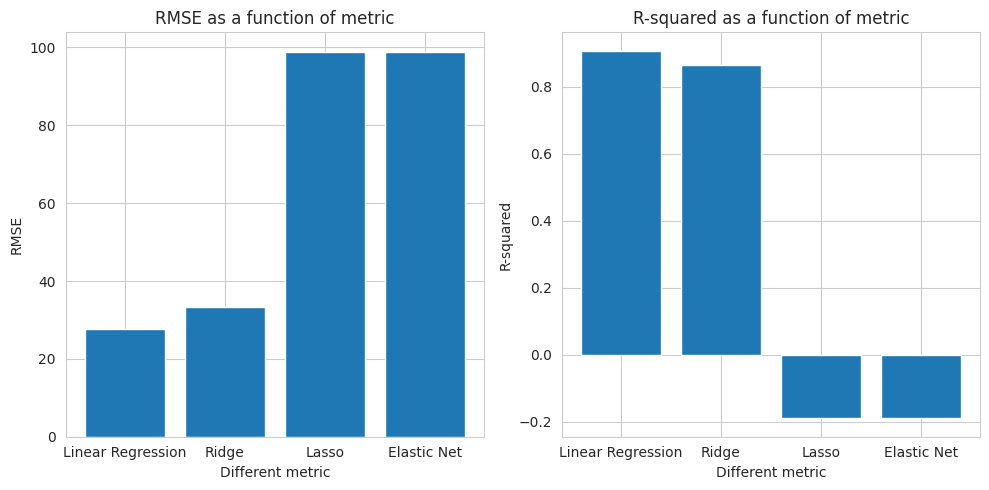

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(regularization_types, rmse_values)
ax1.set_xlabel('Different metric')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE as a function of metric')

ax2.bar(regularization_types, r2_values)
ax2.set_xlabel('Different metric')
ax2.set_ylabel('R-squared')
ax2.set_title('R-squared as a function of metric')

plt.tight_layout()
plt.show()

After analyzing the previous results, it can be observed that the vanilla Linear Regression model still surpasses all other Linear Regression models with regularization. It has the lowest Root Mean Squared Error (RMSE) and the highest R-squared (R2) score among them.

### **5.2 SVR**

In the case of SVR, we performed a grid search to test the following hyperparameters: "kernel", "C", "gamma", "degree", and "coef_0".

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the parameter grid for tuning
param_grid = [
    {'reg__kernel': ['linear'], 'reg__C': [0.01, 0.1, 1, 10, 100]},
    {'reg__kernel': ['rbf'], 'reg__C': [0.01, 0.1, 1, 10, 100], 'reg__gamma': [0.01, 0.1, 1, 10, 100]},
    {'reg__kernel': ['poly'], 'reg__C': [0.01, 0.1, 1, 10, 100], 'reg__degree': [2, 3, 4], 'reg__coef0': [0.1, 1, 10]}
]

# Create a pipeline with standardization and SVR model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', SVR())
])

# Define the GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_reg, y_train_reg)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict the target values for the test set
y_pred = best_model.predict(X_test_reg)


Best hyperparameters:  {'reg__C': 0.1, 'reg__kernel': 'linear'}
Best score:  0.010812264267070706


In [ ]:
# predict train/test
y_testpred_svr = best_model.predict(X_test_reg)
y_trainpred_svr = best_model.predict(X_train_reg)

In [ ]:
# print result
print_result(y_trainpred_svr,y_testpred_svr,y_train_reg,y_test_reg)

Train data RMSE:  39.5241541081518
Train data MSE:  1562.1587579649329
Train data MAE:  29.018343543207486
---------------------------------------
Test data RMSE:  31.149043739029228
Test data MSE:  970.262925855956
Test data MAE:  22.605159841211343
---------------------------------------
Train data explained variance regression score: 0.8881382237770298
Test data explained variance regression score: 0.8972082972225696
---------------------------------------
Train data R2 score: 0.8876207522767747
Test data R2 score: 0.8820357101347449




### **5.3 Random Forest**

We employed grid search to evaluate the following hyperparameters for Random Forest: "n_estimators", "max_depth", "min_samples_split", "min_samples_leaf", and "max_features".

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the GridSearchCV object
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV object to the training data
rf_grid.fit(X_train_reg, y_train_reg)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", rf_grid.best_params_)
print("Best score: ", -rf_grid.best_score_)

# Get the best model
best_rf_model = rf_grid.best_estimator_

# Predict the target values for the test set
y_pred = best_rf_model.predict(X_test_reg)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best score:  0.0230270560275861


In [ ]:
# predict train/test
y_testpred_rf = best_rf_model.predict(X_test_reg)
y_trainpred_rf = best_rf_model.predict(X_train_reg)

In [ ]:
# print result
print_result(y_trainpred_rf,y_testpred_rf,y_train_reg,y_test_reg)

Train data RMSE:  24.054253938177045
Train data MSE:  578.6071325223058
Train data MAE:  17.17300529033573
---------------------------------------
Test data RMSE:  51.61771612393624
Test data MSE:  2664.3886178512676
Test data MAE:  39.242272429224755
---------------------------------------
Train data explained variance regression score: 0.9584402317984609
Test data explained variance regression score: 0.6761345731302196
---------------------------------------
Train data R2 score: 0.958375911571973
Test data R2 score: 0.6760643915641538




### **5.4 KNN**

As for the evaluation for K-nearest neighbours, we have studied the impact of different parameters, such as k and distance metrics, on the model's performance.

#### **5.4.1 Different k**

The k parameter is essential for KNN because it determines the number of nearest neighbors considered when making predictions. Our evaluation of different k values between 5 to 50 shows that an optimal k value of around 25 can lead to the best prediction results.

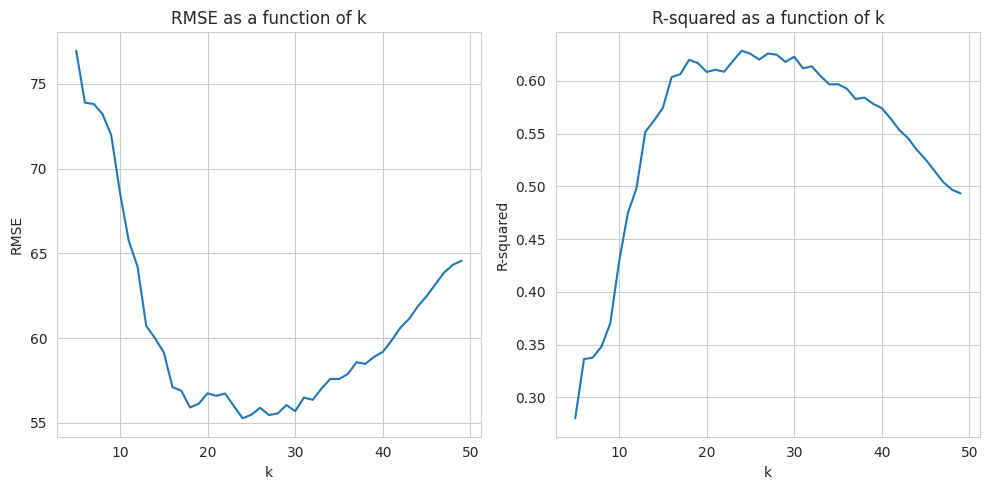

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

k_values = range(5, 50)
rmse_values = []
mae_values = []
r2_values = []

for k in k_values:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_reg, y_train_reg)
    
    y_testpred_knn = knn.predict(X_test_reg)

    test_predict = scaler2.inverse_transform(y_testpred_knn.reshape(-1,1))
    original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1)) 
  
    rmse = math.sqrt(mean_squared_error(original_ytest, test_predict))
    mae = mean_absolute_error(original_ytrain,train_predict)
    r2 = r2_score(original_ytest,test_predict)

    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_values.append(r2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


ax1.plot(k_values, rmse_values)
ax1.set_xlabel('k')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE as a function of k')

ax2.plot(k_values, r2_values)
ax2.set_xlabel('k')
ax2.set_ylabel('R-squared')
ax2.set_title('R-squared as a function of k')

plt.tight_layout()
plt.show()


#### **5.4.2 Different distance metrics**

We have evaluated the impact of different distance metrics, including 'Euclidean', 'Manhattan', and 'Chebyshev,' which are crucial for measuring similarity between data points and identifying nearest neighbors.

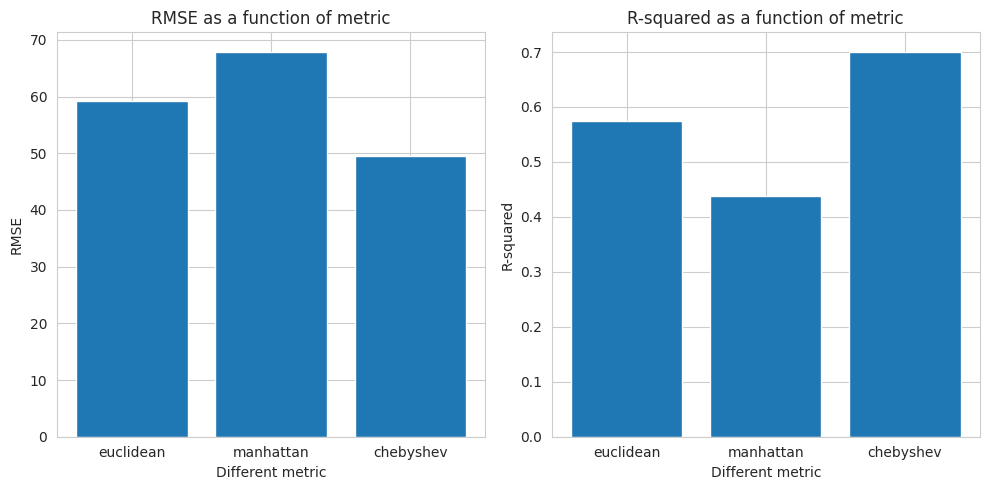

In [ ]:
from sklearn.model_selection import GridSearchCV


metric_values = ['euclidean', 'manhattan', 'chebyshev']
rmse_values = []
mae_values = []
r2_values = []

param_grid = {'metric': metric_values}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_root_mean_squared_error')

grid_search.fit(X_train_reg, y_train_reg)


for metric in metric_values:
    knn = neighbors.KNeighborsRegressor(n_neighbors=15, metric=metric)
  
    knn.fit(X_train_reg, y_train_reg)

    y_testpred_knn = knn.predict(X_test_reg)

    test_predict = scaler2.inverse_transform(y_testpred_knn.reshape(-1,1))
    original_ytest = scaler2.inverse_transform(y_test_reg.reshape(-1,1)) 
  
    rmse = math.sqrt(mean_squared_error(original_ytest, test_predict))
    r2 = r2_score(original_ytest,test_predict)

    rmse_values.append(rmse)
    r2_values.append(r2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(metric_values, rmse_values)
ax1.set_xlabel('Different metric')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE as a function of metric')

ax2.bar(metric_values, r2_values)
ax2.set_xlabel('Different metric')
ax2.set_ylabel('R-squared')
ax2.set_title('R-squared as a function of metric')

plt.tight_layout()
plt.show()

### **5.5 LSTM**

Our evaluation of the LSTM model for this time series dataset focuses on three crucial hyperparameters: learning rate, dropout rate, and activation functions.

#### **5.5.1 Different learning rate**

Learning rate is an essential parameter for the performance of LSTM because it determines how quickly the model adjusts its internal weights based on the errors during training.

3/3 [==============================] - 4s 13ms/step


3/3 [==============================] - 1s 9ms/step


3/3 [==============================] - 1s 9ms/step


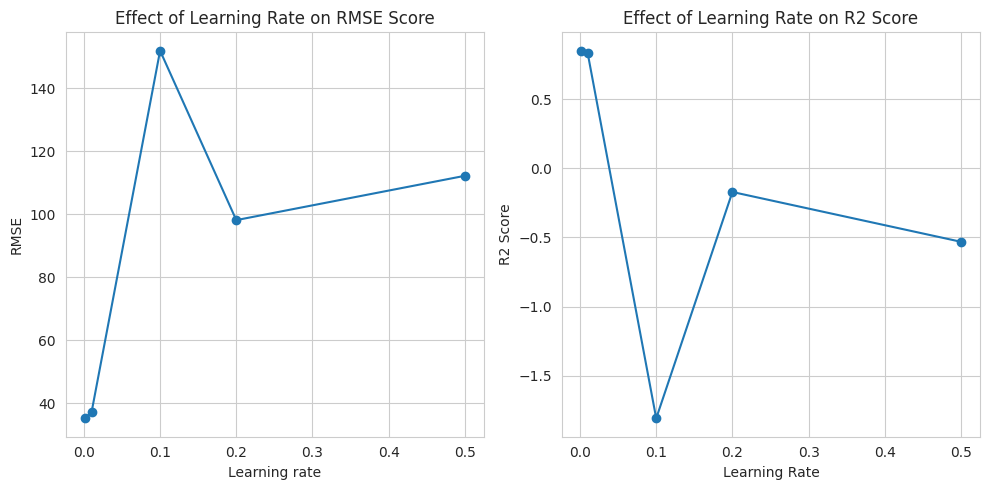

In [ ]:
lr_range = [0.001, 0.01, 0.1, 0.2, 0.5]

rmse_scores = []
r2_scores = []


for lr in lr_range:
    tf.keras.backend.clear_session()
    model=Sequential()
    model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='mean_squared_error',optimizer=optimizer)

    model.fit(X_train_reg,y_train_reg,validation_data=(X_test_reg,y_test_reg),epochs=50,batch_size=5,verbose=0)

    y_pred = model.predict(X_test_reg)
    y_pred = scaler2.inverse_transform(y_pred)
    y_true = scaler2.inverse_transform(y_test_reg.reshape(-1,1))

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(lr_range, rmse_scores, 'o-')
ax1.set_xlabel('Learning rate')
ax1.set_ylabel('RMSE')
ax1.set_title('Effect of Learning Rate on RMSE Score')


ax2.plot(lr_range, r2_scores, 'o-')
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('R2 Score')
ax2.set_title('Effect of Learning Rate on R2 Score')

plt.tight_layout()
plt.show()

#### **5.5.2 Different dropout rate**

 Dropout rate, on the other hand, is a regularization technique that prevents overfitting by randomly dropping out some of the LSTM neurons during training.

3/3 [==============================] - 1s 8ms/step


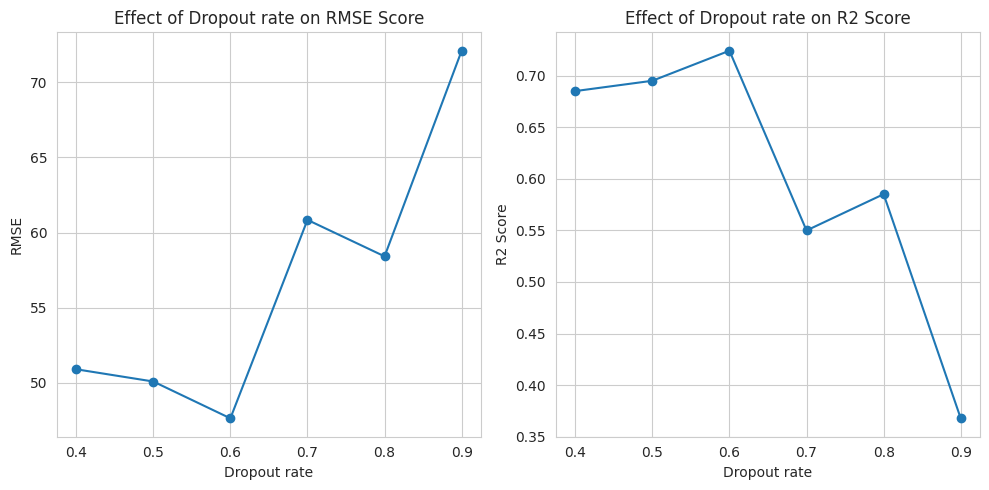

In [ ]:
dropout_range = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

rmse_scores = []
r2_scores = []

for dropout_rate in dropout_range:
    tf.keras.backend.clear_session()
    model=Sequential()
    model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(LSTM(32,return_sequences=True))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(LSTM(32))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

    model.fit(X_train_reg,y_train_reg,validation_data=(X_test_reg,y_test_reg),epochs=50,batch_size=5,verbose=0)

    y_pred = model.predict(X_test_reg)
    y_pred = scaler2.inverse_transform(y_pred)
    y_true = scaler2.inverse_transform(y_test_reg.reshape(-1,1))
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(dropout_range, rmse_scores, 'o-')
ax1.set_xlabel('Dropout rate')
ax1.set_ylabel('RMSE')
ax1.set_title('Effect of Dropout rate on RMSE Score')


ax2.plot(dropout_range, r2_scores, 'o-')
ax2.set_xlabel('Dropout rate')
ax2.set_ylabel('R2 Score')
ax2.set_title('Effect of Dropout rate on R2 Score')

plt.tight_layout()
plt.show()

#### **5.5.3 Different activation function**

Activation functions are responsible for introducing non-linearities to the LSTM network, which allows it to model complex relationships between inputs and outputs.

3/3 [==============================] - 0s 10ms/step


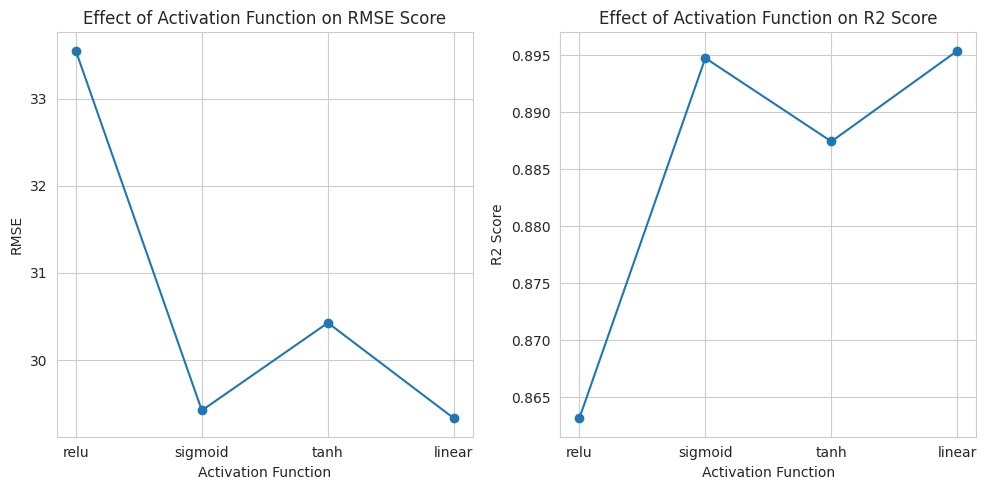

In [ ]:
activation_functions = ['relu', 'sigmoid', 'tanh', 'linear']

rmse_scores = []
r2_scores = []

for act_fn in activation_functions:
    tf.keras.backend.clear_session()
    model=Sequential()
    model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1), activation=act_fn))
    model.add(LSTM(32,return_sequences=True, activation=act_fn))
    model.add(LSTM(32, activation=act_fn))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error',optimizer=optimizer)

    model.fit(X_train_reg,y_train_reg,validation_data=(X_test_reg,y_test_reg),epochs=50,batch_size=5,verbose=0)

    y_pred = model.predict(X_test_reg)
    y_pred = scaler2.inverse_transform(y_pred)
    y_true = scaler2.inverse_transform(y_test_reg.reshape(-1,1))

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(activation_functions, rmse_scores, 'o-')
ax1.set_xlabel('Activation Function')
ax1.set_ylabel('RMSE')
ax1.set_title('Effect of Activation Function on RMSE Score')


ax2.plot(activation_functions, r2_scores, 'o-')
ax2.set_xlabel('Activation Function')
ax2.set_ylabel('R2 Score')
ax2.set_title('Effect of Activation Function on R2 Score')

plt.tight_layout()
plt.show()


**Print result function**

---

This function takes in the prediced train and test result, true train and test result, and then inverse transform them to the original scale and print out all metrics for evaluation.

In [ ]:
def print_result(y_pred_train,y_pred_test,y_train,y_test):
  train_predict = scaler2.inverse_transform(y_pred_train.reshape(-1,1))
  test_predict = scaler2.inverse_transform(y_pred_test.reshape(-1,1))
  original_ytrain = scaler2.inverse_transform(y_train.reshape(-1,1)) 
  original_ytest = scaler2.inverse_transform(y_test.reshape(-1,1)) 

  print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
  print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
  print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
  print("---------------------------------------")
  print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
  print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
  print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
  print("---------------------------------------")
  print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
  print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
  print("---------------------------------------")
  print("Train data R2 score:", r2_score(original_ytrain, train_predict))
  print("Test data R2 score:", r2_score(original_ytest, test_predict))
  print("\n")

## **6. Dataset shift Training**


### Timeseries Dataset shfit with noise

**Dataset with noise**

---
We created shifted dataset by adding noise from normal distribution to the difference of two consecutive days' data, and fit the new dataset to all the models

In [ ]:
opendf = stock_df['Open']
scaler2=MinMaxScaler(feature_range=(0,1))
opendf=scaler2.fit_transform(np.array(opendf).reshape(-1,1))

training_size=int(len(opendf)*0.65)
test_size=len(opendf)-training_size
train_data,test_data=opendf[0:training_size,:],opendf[training_size:len(opendf),:1]


In [ ]:
def create_dataset_noise(dataset,testset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    X_train = np.array(dataX)
    diff = np.diff(X_train, axis=0)
    noise = np.random.normal(loc=0.0, scale=0.01, size=diff.shape)
    diff_noisy = diff + noise
    X_train_noisy = np.concatenate([X_train[0:1,:], diff_noisy], axis=0).cumsum(axis=0)
    if testset:
      return np.array(dataX), np.array(dataY)
    else:
      return X_train_noisy,np.array(dataY)

In [ ]:
time_step = 15
X_train_noise, y_train_noise = create_dataset_noise(train_data,False, time_step)
X_test_noise, y_test_noise = create_dataset_noise(test_data,True, time_step)

In [ ]:
X_train_noise

array([[0.62295082, 0.57991803, 0.57581967, ..., 0.50522551, 0.50614754,
        0.52254098],
       [0.58680074, 0.5817617 , 0.52546035, ..., 0.50192367, 0.50732463,
        0.49273763],
       [0.59081013, 0.53441593, 0.55739468, ..., 0.50690057, 0.51099485,
        0.71801714],
       ...,
       [0.47850175, 0.40515135, 0.31264004, ..., 0.47360714, 0.35259004,
        0.34276208],
       [0.43584519, 0.36142168, 0.26260327, ..., 0.48483933, 0.31338431,
        0.34316143],
       [0.40551776, 0.30648757, 0.10075703, ..., 0.42245766, 0.30960665,
        0.34291372]])

### **6.1 Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_noise,y_train_noise)
y_testpred_lr_noise = lr.predict(X_test_noise)
y_trainpred_lr_noise = lr.predict(X_train_noise)
print_result(y_trainpred_lr_noise,y_testpred_lr_noise,y_train_noise,y_test_noise)

Train data RMSE:  37.44011326400204
Train data MSE:  1401.7620812213015
Train data MAE:  28.050622834744853
---------------------------------------
Test data RMSE:  36.042913731003026
Test data MSE:  1299.0916302205264
Test data MAE:  31.643716427467876
---------------------------------------
Train data explained variance regression score: 0.8991594373034084
Test data explained variance regression score: 0.9042026290401857
---------------------------------------
Train data R2 score: 0.8991594373034084
Test data R2 score: 0.8420568100201618




### **6.2 SVR**

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_noise, y_train_noise)
y_testpred_svr_noise = svr.predict(X_test_noise)
y_trainpred_svr_noise = svr.predict(X_train_noise)
print_result(y_trainpred_svr_noise,y_testpred_svr_noise,y_train_noise,y_test_noise)

Train data RMSE:  34.87459896712722
Train data MSE:  1216.237653117951
Train data MAE:  29.69509841034715
---------------------------------------
Test data RMSE:  49.002947208797735
Test data MSE:  2401.2888351482175
Test data MAE:  40.57803942849023
---------------------------------------
Train data explained variance regression score: 0.9126972950059593
Test data explained variance regression score: 0.7360690134171377
---------------------------------------
Train data R2 score: 0.9125057733004597
Test data R2 score: 0.708051988125043




### **6.3 Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state = 42)
regressor.fit(X_train_noise, y_train_noise)
y_testpred_rf_noise = regressor.predict(X_test_noise)
y_trainpred_rf_noise = regressor.predict(X_train_noise)
print_result(y_trainpred_rf_noise,y_testpred_rf_noise,y_train_noise,y_test_noise)

Train data RMSE:  14.895140726411249
Train data MSE:  221.86521725959503
Train data MAE:  10.750141996413781
---------------------------------------
Test data RMSE:  35.569600288352355
Test data MSE:  1265.196464673156
Test data MAE:  26.57512187152779
---------------------------------------
Train data explained variance regression score: 0.9840394202861752
Test data explained variance regression score: 0.8536357549887813
---------------------------------------
Train data R2 score: 0.9840393647031982
Test data R2 score: 0.8461777745825596




### **6.4 KNN**

In [ ]:
from sklearn import neighbors

K = time_step
knn = neighbors.KNeighborsRegressor(n_neighbors = K)
knn.fit(X_train_noise, y_train_noise)
y_testpred_knn_noise = knn.predict(X_test_noise)
y_trainpred_knn_noise = knn.predict(X_train_noise)
print_result(y_trainpred_knn_noise,y_testpred_knn_noise,y_train_noise,y_test_noise)

Train data RMSE:  50.2270066710977
Train data MSE:  2522.752199138493
Train data MAE:  36.07551984
---------------------------------------
Test data RMSE:  58.678659249648426
Test data MSE:  3443.185051336351
Test data MAE:  41.162176731481495
---------------------------------------
Train data explained variance regression score: 0.8191456357429825
Test data explained variance regression score: 0.5906445932239613
---------------------------------------
Train data R2 score: 0.8185171687027344
Test data R2 score: 0.5813785432466843




### **6.5 LSTM**

In [ ]:
X_train =X_train_noise.reshape(X_train_noise.shape[0],X_train_noise.shape[1], 1)
X_test = X_test_noise.reshape(X_test_noise.shape[0],X_test_noise.shape[1], 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train_noise,y_train_noise,validation_data=(X_test_noise,y_test_noise),epochs=200,batch_size=5,verbose=1)
train_predict=model.predict(X_train_noise)
test_predict=model.predict(X_test_noise)

Epoch 1/200
29/29 [==============================] - 12s 96ms/step - loss: 0.0618 - val_loss: 0.0436
Epoch 2/200
29/29 [==============================] - 1s 23ms/step - loss: 0.0431 - val_loss: 0.0500
Epoch 3/200
29/29 [==============================] - 1s 19ms/step - loss: 0.0326 - val_loss: 0.0205
Epoch 4/200
29/29 [==============================] - 1s 20ms/step - loss: 0.0301 - val_loss: 0.0205
Epoch 5/200
29/29 [==============================] - 1s 23ms/step - loss: 0.0292 - val_loss: 0.0199
Epoch 6/200
29/29 [==============================] - 1s 21ms/step - loss: 0.0288 - val_loss: 0.0204
Epoch 7/200
29/29 [==============================] - 1s 22ms/step - loss: 0.0276 - val_loss: 0.0210
Epoch 8/200
29/29 [==============================] - 1s 21ms/step - loss: 0.0282 - val_loss: 0.0210
Epoch 9/200
29/29 [==============================] - 1s 22ms/step - loss: 0.0243 - val_loss: 0.0155
Epoch 10/200
29/29 [==============================] - 1s 22ms/step - loss: 0.0236 - val_loss: 0.014

In [ ]:
print_result(train_predict,test_predict,y_train_noise,y_test_noise)

Train data RMSE:  27.611095481522977
Train data MSE:  762.3725936897786
Train data MAE:  21.642929189062503
---------------------------------------
Test data RMSE:  43.278382390794796
Test data MSE:  1873.0183823638572
Test data MAE:  35.23150636197915
---------------------------------------
Train data explained variance regression score: 0.9471026717261577
Test data explained variance regression score: 0.8113056510112381
---------------------------------------
Train data R2 score: 0.9451561128938826
Test data R2 score: 0.7722789591437784




### **6.6 GRU**

In [ ]:
X_train =X_train_noise.reshape(X_train_noise.shape[0],X_train_noise.shape[1] , 1)
X_test = X_test_noise.reshape(X_test_noise.shape[0],X_test_noise.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (145, 15, 1)
X_test:  (72, 15, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train_noise,y_train_noise,validation_data=(X_test_noise,y_test_noise),epochs=200,batch_size=5,verbose=1)
train_predict=model.predict(X_train_reg)
test_predict=model.predict(X_test_reg)


Epoch 1/200
29/29 [==============================] - 11s 123ms/step - loss: 0.0512 - val_loss: 0.0162
Epoch 2/200
29/29 [==============================] - 1s 28ms/step - loss: 0.0257 - val_loss: 0.0146
Epoch 3/200
29/29 [==============================] - 1s 22ms/step - loss: 0.0224 - val_loss: 0.0171
Epoch 4/200
29/29 [==============================] - 1s 24ms/step - loss: 0.0221 - val_loss: 0.0161
Epoch 5/200
29/29 [==============================] - 1s 27ms/step - loss: 0.0195 - val_loss: 0.0116
Epoch 6/200
29/29 [==============================] - 1s 23ms/step - loss: 0.0183 - val_loss: 0.0111
Epoch 7/200
29/29 [==============================] - 1s 25ms/step - loss: 0.0160 - val_loss: 0.0090
Epoch 8/200
29/29 [==============================] - 1s 27ms/step - loss: 0.0149 - val_loss: 0.0113
Epoch 9/200
29/29 [==============================] - 1s 28ms/step - loss: 0.0133 - val_loss: 0.0065
Epoch 10/200
29/29 [==============================] - 1s 27ms/step - loss: 0.0123 - val_loss: 0.00

In [ ]:
print_result(train_predict,test_predict,y_train_noise,y_test_noise)

Train data RMSE:  53.236978628535766
Train data MSE:  2834.175893495174
Train data MAE:  44.481099308674565
---------------------------------------
Test data RMSE:  46.56296874175991
Test data MSE:  2168.11005804611
Test data MAE:  39.31491766558159
---------------------------------------
Train data explained variance regression score: 0.8844397668101227
Test data explained variance regression score: 0.8603920156458967
---------------------------------------
Train data R2 score: 0.7961138372125447
Test data R2 score: 0.736401797356631




## **7. Timestep shift Training**

***Datasets with diferent time_step***

---
We created different datasets with different time_step including 10,15,20,25. And feed all these new dataset to all models.

In [ ]:
opendf = stock_df['Open']
scaler2=MinMaxScaler(feature_range=(0,1))
opendf=scaler2.fit_transform(np.array(opendf).reshape(-1,1))

training_size=int(len(opendf)*0.65)
test_size=len(opendf)-training_size
train_data,test_data=opendf[0:training_size,:],opendf[training_size:len(opendf),:1]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

timesteps = [10,15,20,25]
for i in timesteps:
  X_train_name = f"X_train_{i}"
  y_train_name = f"y_train_{i}"
  X_test_name = f"X_test_{i}"
  y_test_name = f"y_test_{i}"
  globals()[X_train_name], globals()[y_train_name] = create_dataset_noise(train_data,False, i)
  globals()[X_test_name],globals()[y_test_name] = create_dataset_noise(test_data,True, i)

In [ ]:
trainX_datasets = [X_train_10,X_train_15,X_train_20,X_train_25]
trainY_datasets = [y_train_10,y_train_15,y_train_20,y_train_25]
testX_datasets = [X_test_10,X_test_15,X_test_20,X_test_25]
testY_datasets = [y_test_10,y_test_15,y_test_20,y_test_25]

### **7.1 Linear Regression**

In [ ]:
for index,i in enumerate(timesteps):
  lr_model= f"lr_{i}"
  globals()[lr_model] = LinearRegression()
  locals()[lr_model].fit(trainX_datasets[index],trainY_datasets[index])
  y_pred_train = locals()[lr_model].predict(trainX_datasets[index])
  y_pred_test = locals()[lr_model].predict(testX_datasets[index])
  print("The result for Linear Regression Model with timestep = "+str(i))
  print_result(y_pred_train,y_pred_test,trainY_datasets[index],testY_datasets[index])
  

The result for Linear Regression Model with timestep = 10
Train data RMSE:  41.71162729987434
Train data MSE:  1739.8598520036223
Train data MAE:  30.66348723300055
---------------------------------------
Test data RMSE:  35.895650768114386
Test data MSE:  1288.4977440664309
Test data MAE:  27.38510440932054
---------------------------------------
Train data explained variance regression score: 0.8709944043211016
Test data explained variance regression score: 0.9032636707774722
---------------------------------------
Train data R2 score: 0.8709944043211016
Test data R2 score: 0.8526211781231293


The result for Linear Regression Model with timestep = 15
Train data RMSE:  38.427717242020826
Train data MSE:  1476.689452432705
Train data MAE:  27.84774169439098
---------------------------------------
Test data RMSE:  37.12970341973956
Test data MSE:  1378.61487603782
Test data MAE:  31.656426379198074
---------------------------------------
Train data explained variance regression score: 

### **7.2 SVR**

In [ ]:
for index,i in enumerate(timesteps):
  svr_model= f"svr_{i}"
  globals()[svr_model] = SVR()
  locals()[svr_model].fit(trainX_datasets[index],trainY_datasets[index])
  y_pred_train = locals()[svr_model].predict(trainX_datasets[index])
  y_pred_test = locals()[svr_model].predict(testX_datasets[index])
  print("The result for SVR model with timestep = "+str(i))
  print_result(y_pred_train,y_pred_test,trainY_datasets[index],testY_datasets[index])
  

The result for SVR model with timestep = 10
Train data RMSE:  35.29386036675851
Train data MSE:  1245.6565795882473
Train data MAE:  29.054562844925343
---------------------------------------
Test data RMSE:  40.636279764551304
Test data MSE:  1651.3072331028818
Test data MAE:  30.08045693823328
---------------------------------------
Train data explained variance regression score: 0.9077556981117053
Test data explained variance regression score: 0.8153566006924043
---------------------------------------
Train data R2 score: 0.9076381532247769
Test data R2 score: 0.811122902083319


The result for SVR model with timestep = 15
Train data RMSE:  35.88047720061024
Train data MSE:  1287.4086441435109
Train data MAE:  30.57247191898176
---------------------------------------
Test data RMSE:  52.84297433009484
Test data MSE:  2792.3799360510625
Test data MAE:  46.77969675732372
---------------------------------------
Train data explained variance regression score: 0.9076162219341034
Test dat

### **7.3 Random Forest**

In [ ]:
for index,i in enumerate(timesteps):
  rf_model= f"rf_{i}"
  globals()[rf_model] = RandomForestRegressor(random_state = 42)
  locals()[rf_model].fit(trainX_datasets[index],trainY_datasets[index])
  y_pred_train = locals()[rf_model].predict(trainX_datasets[index])
  y_pred_test = locals()[rf_model].predict(testX_datasets[index])
  print("The result for SVR model with timestep = "+str(i))
  print_result(y_pred_train,y_pred_test,trainY_datasets[index],testY_datasets[index])
 

The result for SVR model with timestep = 10
Train data RMSE:  16.611725539525963
Train data MSE:  275.9494254005391
Train data MAE:  11.91685282833329
---------------------------------------
Test data RMSE:  41.36383425234113
Test data MSE:  1710.966784055149
Test data MAE:  30.01860803922081
---------------------------------------
Train data explained variance regression score: 0.9795766596642815
Test data explained variance regression score: 0.8455469655292804
---------------------------------------
Train data R2 score: 0.9795391450868584
Test data R2 score: 0.804299021813805


The result for SVR model with timestep = 15
Train data RMSE:  16.344964926815493
Train data MSE:  267.15787845882863
Train data MAE:  11.78770364531032
---------------------------------------
Test data RMSE:  44.41943992811609
Test data MSE:  1973.086643527514
Test data MAE:  37.969452289722234
---------------------------------------
Train data explained variance regression score: 0.9807901622745998
Test data 

### **7.4 LSTM**

In [ ]:
for index,i in enumerate(timesteps):
  lstm_model= f"lstm_{i}"
  tf.keras.backend.clear_session()
  globals()[lstm_model]=Sequential()
  locals()[lstm_model].add(LSTM(32,return_sequences=True,input_shape=(i,1)))
  locals()[lstm_model].add(LSTM(32,return_sequences=True))
  locals()[lstm_model].add(LSTM(32))
  locals()[lstm_model].add(Dense(1))
  locals()[lstm_model].compile(loss='mean_squared_error',optimizer='adam')
  locals()[lstm_model].fit(trainX_datasets[index],trainY_datasets[index],epochs=200,batch_size=5,verbose=0)
  y_pred_train = locals()[lstm_model].predict(trainX_datasets[index])
  y_pred_test = locals()[lstm_model].predict(testX_datasets[index])
  print("The result for LSTM model with timestep = "+str(i))
  print_result(y_pred_train,y_pred_test,trainY_datasets[index],testY_datasets[index])


3/3 [==============================] - 0s 11ms/step
The result for LSTM model with timestep = 10
Train data RMSE:  36.4214995716409
Train data MSE:  1326.5256310470384
Train data MAE:  25.84420899427084
---------------------------------------
Test data RMSE:  38.789734549754755
Test data MSE:  1504.6435064404377
Test data MAE:  26.985167633928576
---------------------------------------
Train data explained variance regression score: 0.9018750727911813
Test data explained variance regression score: 0.8728217672710479
---------------------------------------
Train data R2 score: 0.9016419460340571
Test data R2 score: 0.8278983503502024


3/3 [==============================] - 0s 11ms/step
The result for LSTM model with timestep = 15
Train data RMSE:  31.81325075185095
Train data MSE:  1012.0829234001452
Train data MAE:  23.40276467068965
---------------------------------------
Test data RMSE:  65.79441850609275
Test data MSE:  4328.90550655488
Test data MAE:  56.555555536458336
----------

### **7.5 KNN** 

In [ ]:
K = 15
for index,i in enumerate(timesteps):
  knn_model= f"knn_{i}"
  globals()[knn_model] = neighbors.KNeighborsRegressor(n_neighbors = K)
  locals()[knn_model].fit(trainX_datasets[index],trainY_datasets[index])
  y_pred_train = locals()[knn_model].predict(trainX_datasets[index])
  y_pred_test = locals()[knn_model].predict(testX_datasets[index])
  print("The result for KNN model with timestep = "+str(i))
  print_result(y_pred_train,y_pred_test,trainY_datasets[index],testY_datasets[index])
 


The result for KNN model with timestep = 10
Train data RMSE:  48.955993326183346
Train data MSE:  2396.6892825533087
Train data MAE:  35.05217883066667
---------------------------------------
Test data RMSE:  53.950027964355876
Test data MSE:  2910.6055173547807
Test data MAE:  39.412425138528185
---------------------------------------
Train data explained variance regression score: 0.8237275351266812
Test data explained variance regression score: 0.6772091034974115
---------------------------------------
Train data R2 score: 0.8222923943000569
Test data R2 score: 0.6670839246157412


The result for KNN model with timestep = 15
Train data RMSE:  48.1161394137731
Train data MSE:  2315.162872085649
Train data MAE:  36.398114290574725
---------------------------------------
Test data RMSE:  65.59005483507936
Test data MSE:  4302.055293268717
Test data MAE:  49.989400928703695
---------------------------------------
Train data explained variance regression score: 0.835000824029037
Test dat

### **7.6 GRU**



In [ ]:
for index,i in enumerate(timesteps):
  gru_model= f"gru_{i}"
  tf.keras.backend.clear_session()
  globals()[gru_model]=Sequential()
  locals()[gru_model].add(GRU(32,return_sequences=True,input_shape=(i,1)))
  locals()[gru_model].add(GRU(32,return_sequences=True))
  locals()[gru_model].add(GRU(32,return_sequences=True))
  locals()[gru_model].add(GRU(32))
  locals()[gru_model].add(Dense(1))
  locals()[gru_model].compile(loss='mean_squared_error',optimizer='adam')
  locals()[gru_model].fit(trainX_datasets[index],trainY_datasets[index],epochs=200,batch_size=5,verbose=0)
  y_pred_train = locals()[gru_model].predict(trainX_datasets[index])
  y_pred_test = locals()[gru_model].predict(testX_datasets[index])
  print("The result for GRU model with timestep = "+str(i))
  print_result(y_pred_train,y_pred_test,trainY_datasets[index],testY_datasets[index])

3/3 [==============================] - 0s 15ms/step
The result for GRU model with timestep = 10
Train data RMSE:  33.38738676102741
Train data MSE:  1114.7175947304281
Train data MAE:  24.30029783572917
---------------------------------------
Test data RMSE:  46.554572341392266
Test data MSE:  2167.328205889926
Test data MAE:  35.671852808035716
---------------------------------------
Train data explained variance regression score: 0.9216809987972747
Test data explained variance regression score: 0.8362453318862285
---------------------------------------
Train data R2 score: 0.9173469017309974
Test data R2 score: 0.752100243034573


3/3 [==============================] - 0s 21ms/step
The result for GRU model with timestep = 15
Train data RMSE:  24.672798890143934
Train data MSE:  608.7470050734877
Train data MAE:  19.239240979956907
---------------------------------------
Test data RMSE:  52.21460433790815
Test data MSE:  2726.364906164297
Test data MAE:  44.1981709798177
-------------